In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_toload = "data/city_data.csv"
ride_data_toload = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_toload)
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
ride_data_toload = "data/ride_data.csv"
ride_data = pd.read_csv(ride_data_toload)
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
# Combine the data into a single dataset
merge_table = pd.merge(ride_data, city_data, on= "city", how= 'left')
# Display the data table for preview
merge_table.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [37]:
merge_table['average_fare']= merge_table['fare']
merge_table.head()

,city,date,fare,ride_id,driver_count,type,average_fare
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban,13.83
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban,30.24
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban,33.44
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban,23.44
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban,34.58


In [38]:
city_groups= merge_table.groupby(['city'])

In [39]:
x_axis = city_groups['type'].count()

In [40]:
y_axis = city_groups['average_fare'].mean()

In [41]:
z_axis = city_groups['driver_count'].sum()

In [42]:
city_type= city_data.set_index('city')['type']

In [43]:
summary_city = pd.DataFrame({"Average fare": y_axis, "Total Number of Rides (per city)": x_axis, "Driver count": z_axis, "City type": city_type})
summary_city.head()

,Average fare,Total Number of Rides (per city),Driver count,City type
Amandaburgh,24.641667,18,216,Urban
Barajasview,25.332273,22,572,Urban
Barronchester,36.422500,16,176,Suburban
Bethanyland,32.956111,18,396,Suburban
Bradshawfurt,40.064000,10,70,Rural


## Bubble Plot of Ride Sharing Data

In [44]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [45]:
urban_df = summary_city.loc[summary_city["City type"] == "Urban", :]

In [46]:
suburban_df = summary_city.loc[summary_city["City type"] == "Suburban", :]

In [47]:
rural_df = summary_city.loc[summary_city["City type"] == "Rural", :]

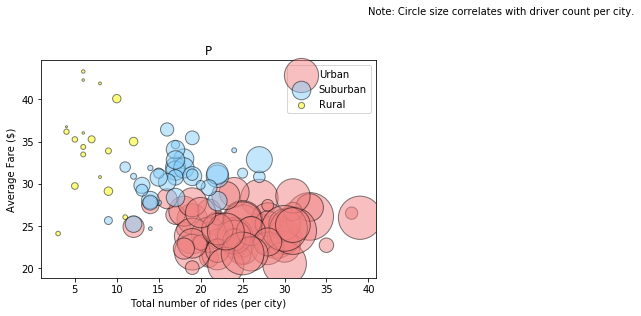

In [90]:
plt.scatter(urban_df["Total Number of Rides (per city)"], urban_df["Average fare"], color = "lightcoral", edgecolors="black", s = urban_df["Driver count"]*1, label = "Urban", alpha = 0.5, linewidth = 1)
plt.scatter(suburban_df["Total Number of Rides (per city)"], suburban_df["Average fare"], color = "lightskyblue", edgecolors ="black", s = suburban_df["Driver count"]*1, label = "Suburban", alpha = 0.5, linewidth = 1)
plt.scatter(rural_df["Total Number of Rides (per city)"], rural_df["Average fare"], color = "yellow", edgecolors = "black", s = rural_df["Driver count"]*1, label = "Rural", alpha = 0.5, linewidth = 1)
plt.title("P")
plt.xlabel("Total number of rides (per city)")
plt.ylabel("Average Fare ($)")
plt.text(40, 50,"Note: Circle size correlates with driver count per city.")
plt.legend(loc= "upper right")
plt.show()

## Total Fares by City Type

In [79]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


In [80]:
fare_pie = summary_city.groupby(["City type"])["Average fare"].sum()
fare_pie.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='City type')

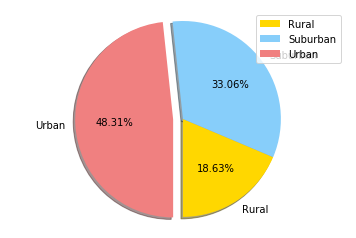

In [81]:
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0, 0.1)
plt.pie(fare_pie, labels = fare_pie.index, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True, startangle = 270)
plt.axis("equal")
plt.legend(loc = "upper right")
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


In [87]:
rides_pie = summary_city.groupby(["City type"])["Total Number of Rides (per city)"].sum()

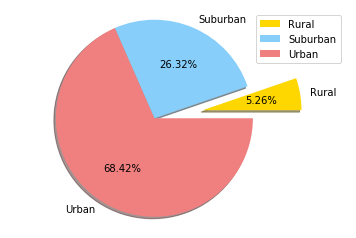

In [88]:
rides_pie.index
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.5,0,0)
plt.pie(rides_pie, labels = rides_pie.index, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True)
plt.axis("equal")
plt.legend(loc = "upper right")
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


In [98]:
drivers_pie = summary_city.groupby(["City type"])["Driver count"].sum()
drivers_pie

City type
Rural         537
Suburban     8570
Urban       59602
Name: Driver count, dtype: int64

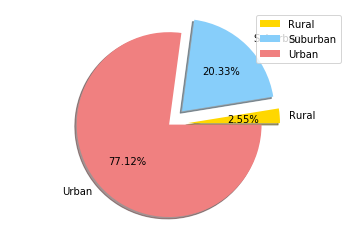

In [97]:
drivers_pie.index
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.2,0.2,0)
plt.pie(drivers_pie, labels = fare_pie.index, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True)
plt.axis("equal")
plt.legend(loc = "upper right")
plt.show()